# import librarys

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Read File and chenage columns

In [3]:
stress = pd.read_csv("Stress.csv")
stress.info()

stress_check = stress

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 19 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                      --------------  ----- 
 0   1. Age                                                                                                                                      2028 non-null   object
 1   2. Gender                                                                                                                                   2028 non-null   object
 2   3. University                                                                                                                               2028 non-null   object
 3   4. Department                                   

In [4]:
stress.columns

Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ',
       '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?',
       '3. In a semester, how often you felt nervous and stressed because of academic pressure? ',
       '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ',
       '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?',
       '6. In a semester, how often you felt as if things in your academic life is going on your way? ',
       '7. In a semester, how often are you able to control irritations in your academic / university 

In [5]:
# change columns
stress.columns = ["Age", "Gender", "University", "Department", "Academic_Year", "CGPA", "Scholarship", "Upset", "control_important_affairs", "Nervous", 
                  "disability", "ability", "Academic_situation", "control_upset_affairs", "Top_performance", "angered_performance","Not_overcome", 
                  "Stress_Value", "Stress_Label"]

stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2028 non-null   object
 1   Gender                     2028 non-null   object
 2   University                 2028 non-null   object
 3   Department                 2028 non-null   object
 4   Academic_Year              2028 non-null   object
 5   CGPA                       2028 non-null   object
 6   Scholarship                2028 non-null   object
 7   Upset                      2028 non-null   int64 
 8   control_important_affairs  2028 non-null   int64 
 9   Nervous                    2028 non-null   int64 
 10  disability                 2028 non-null   int64 
 11  ability                    2028 non-null   int64 
 12  Academic_situation         2028 non-null   int64 
 13  control_upset_affairs      2028 non-null   int64 
 14  Top_perf

# Overview

In [6]:
# create variable for Overview and train, test operation
train, test = train_test_split(stress, test_size=0.2, random_state=2)
stress_view = stress.copy()
train.shape, test.shape

((1622, 19), (406, 19))

In [7]:
stress_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2028 non-null   object
 1   Gender                     2028 non-null   object
 2   University                 2028 non-null   object
 3   Department                 2028 non-null   object
 4   Academic_Year              2028 non-null   object
 5   CGPA                       2028 non-null   object
 6   Scholarship                2028 non-null   object
 7   Upset                      2028 non-null   int64 
 8   control_important_affairs  2028 non-null   int64 
 9   Nervous                    2028 non-null   int64 
 10  disability                 2028 non-null   int64 
 11  ability                    2028 non-null   int64 
 12  Academic_situation         2028 non-null   int64 
 13  control_upset_affairs      2028 non-null   int64 
 14  Top_perf

In [8]:
stress_view.head()

,Age,Gender,University,Department,Academic_Year,CGPA,Scholarship,Upset,control_important_affairs,Nervous,disability,ability,Academic_situation,control_upset_affairs,Top_performance,angered_performance,Not_overcome,Stress_Value,Stress_Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,4,3,2,2,1,2,2,4,4,29,High Perceived Stress
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,3,4,2,3,2,2,2,2,3,24,Moderate Stress
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,0,0,1,0,0,0,0,15,Moderate Stress
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,1,2,1,4,3,2,2,3,2,17,Moderate Stress
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,4,4,4,2,2,2,0,2,4,4,32,High Perceived Stress


In [9]:
stress_view.describe()

,Upset,control_important_affairs,Nervous,disability,ability,Academic_situation,control_upset_affairs,Top_performance,angered_performance,Not_overcome,Stress_Value
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000
mean,2.350099,2.326923,2.708087,2.369329,2.173077,1.790927,1.932446,1.721893,2.426036,2.435897,22.998028
std,1.178962,1.156746,1.132379,1.222703,1.084549,1.098807,1.019723,1.132371,1.177386,1.166602,6.755071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,19.000000
50%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,22.000000
75%,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,27.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,40.000000


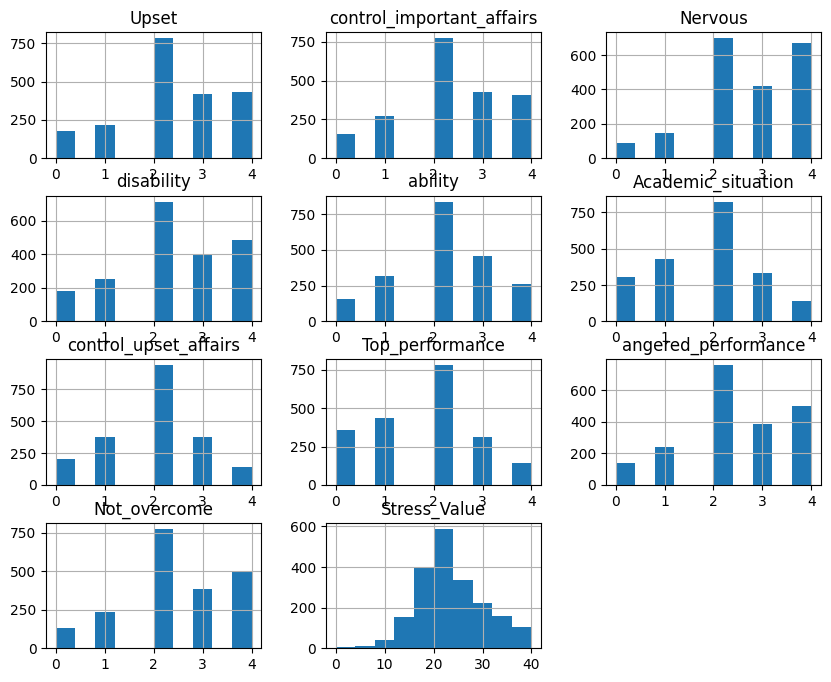

In [10]:
stress_view.hist(figsize=(10,8))
plt.show()

In [11]:
stress_view["Age"].unique()

array(['18-22', '23-26', '27-30', 'Above 30', 'Below 18'], dtype=object)

In [12]:
stress_view["Academic_Year"].value_counts()

Academic_Year
First Year or Equivalent     601
Third Year or Equivalent     570
Fourth Year or Equivalent    403
Second Year or Equivalent    382
Other                         72
Name: count, dtype: int64

In [13]:
stress_view["CGPA"].value_counts()

CGPA
3.00 - 3.39    583
3.40 - 3.79    560
2.50 - 2.99    389
3.80 - 4.00    241
Other          171
Below 2.50      84
Name: count, dtype: int64

In [14]:
stress_view["Gender"].value_counts()

Gender
Male                 1405
Female                613
Prefer not to say      10
Name: count, dtype: int64

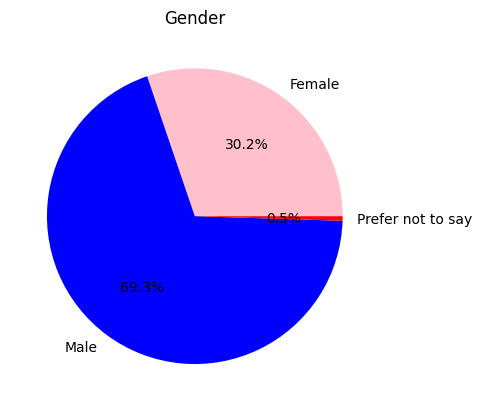

In [15]:
encoder = LabelEncoder()
gender = encoder.fit_transform(stress_view["Gender"])

count = np.bincount(gender)

plt.pie(count, labels=["Female", "Male", "Prefer not to say"], autopct='%1.1f%%', colors=["Pink", "Blue", "Red"])
plt.title("Gender")
plt.show()

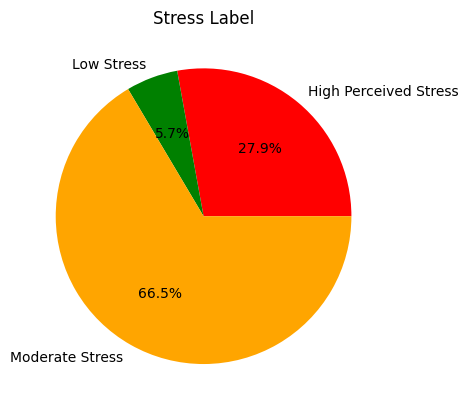

In [16]:
encoder = LabelEncoder()
label = encoder.fit_transform(stress_view["Stress_Label"])

count = np.bincount(label)

plt.pie(count, labels=["High Perceived Stress", "Low Stress", "Moderate Stress"], autopct='%1.1f%%', colors=["Red", "Green", "Orange"])
plt.title("Stress Label")
plt.show()

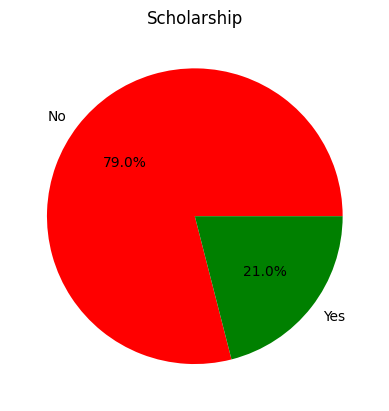

In [17]:
encoder = LabelEncoder()
scholarship = encoder.fit_transform(stress_view["Scholarship"])
scholarship = np.bincount(scholarship)

plt.pie(scholarship, labels=["No", "Yes"], autopct='%1.1f%%', colors=["Red", "Green"])
plt.title("Scholarship")
plt.show()

In [18]:
# encode object columns in general view value for correlations
encoder = OrdinalEncoder(handle_unknown='error')
stressv_encode = encoder.fit_transform(stress_view[["Age", "Gender", "Academic_Year", "CGPA", "Scholarship", "Stress_Label"]])
stressv_encode = pd.DataFrame(stressv_encode, columns=["Age", "Gender", "Academic_Year", "CGPA", "Scholarship", "Stress_Label"])

stressv_num = stress_view.drop(["University", "Department", "Age", "Gender", "Academic_Year", "CGPA", "Scholarship", "Stress_Label"], axis=1)

stressv_encode = pd.concat([stressv_num, stressv_encode], axis=1)

correlation = stressv_encode.corr()
correlation["Stress_Value"].sort_values(ascending=False)
# correlation["Stress_Label"].sort_values(ascending=False)

Stress_Value                 1.000000
control_important_affairs    0.740354
disability                   0.729575
Not_overcome                 0.716285
Nervous                      0.711624
Upset                        0.704604
angered_performance          0.629704
Academic_Year                0.091924
CGPA                         0.015913
Scholarship                 -0.016519
Age                         -0.078521
Gender                      -0.134273
control_upset_affairs       -0.337994
ability                     -0.347962
Top_performance             -0.475724
Academic_situation          -0.484455
Stress_Label                -0.693075
Name: Stress_Value, dtype: float64

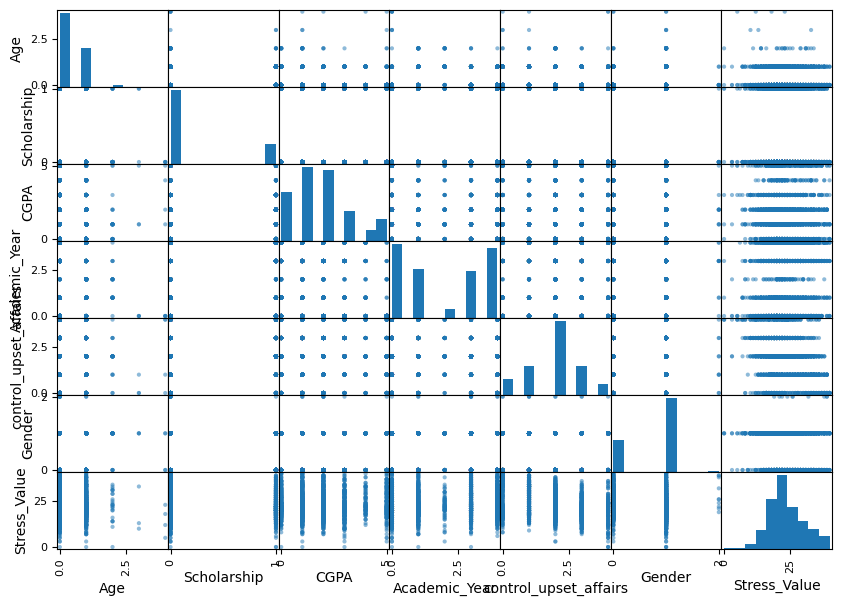

In [19]:
# check other correlations
features = ["Age", "Scholarship", "CGPA", "Academic_Year", "control_upset_affairs", "Gender", "Stress_Value"]

scatter_matrix(stressv_encode[features], figsize=(10,7))
plt.show()

In [20]:
stress_view["Stress_Label"].unique()

array(['High Perceived Stress', 'Moderate Stress', 'Low Stress'],
      dtype=object)

In [24]:
stress_view[stress_view["Stress_Label"] == "High Perceived Stress"][["Stress_Value"]].describe()

,Stress_Value
count,565.000000
mean,31.762832
std,3.688736
min,27.000000
25%,29.000000
50%,31.000000
75%,34.000000
max,40.000000


# Preprocessing Operations
- Remove University, Department columns
- Removing the stress value column due to incompleteness
- Encode object columns

In [64]:
# preprocessing without pipeline

# create data frame for process
df = train.copy()
df_label = df["Stress_Value"].copy()
df = df.drop(["University", "Department", "Stress_Label", "Stress_Value"], axis=1)

df_num = df.drop(["Age", "Gender", "Nervous", "Academic_Year", "CGPA", "Scholarship"], axis=1)
df_cat_ord = ["Age", "Nervous", "Academic_Year", "CGPA", "Scholarship"]
df_cat_one = ["Gender"]

# standardization number data 
scaler = StandardScaler()
number_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# encode category value without Gender
ord_encoder = OrdinalEncoder(handle_unknown='error')
df_ord = pd.DataFrame(ord_encoder.fit_transform(df[df_cat_ord]), columns=df_cat_ord)
df_ord = pd.DataFrame(scaler.fit_transform(df_ord), columns=df_ord.columns)

# encode category Gender Value
one_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_one_en = pd.DataFrame(one_encoder.fit_transform(df[df_cat_one]), columns=one_encoder.get_feature_names_out(["Gender"]))
df_one_en = pd.DataFrame(scaler.fit_transform(df_one_en), columns=df_one_en.columns)

# concatinate data frames
final_df = pd.concat([df_ord, df_one_en, number_scaled], axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1622 non-null   float64
 1   Nervous                    1622 non-null   float64
 2   Academic_Year              1622 non-null   float64
 3   CGPA                       1622 non-null   float64
 4   Scholarship                1622 non-null   float64
 5   Gender_Female              1622 non-null   float64
 6   Gender_Male                1622 non-null   float64
 7   Gender_Prefer not to say   1622 non-null   float64
 8   Upset                      1622 non-null   float64
 9   control_important_affairs  1622 non-null   float64
 10  disability                 1622 non-null   float64
 11  ability                    1622 non-null   float64
 12  Academic_situation         1622 non-null   float64
 13  control_upset_affairs      1622 non-null   float

In [59]:
df.columns

Index(['Age', 'Gender', 'Academic_Year', 'CGPA', 'Scholarship', 'Upset',
       'control_important_affairs', 'Nervous', 'disability', 'ability',
       'Academic_situation', 'control_upset_affairs', 'Top_performance',
       'angered_performance', 'Not_overcome'],
      dtype='object')

In [48]:
df.head()

,Age,Gender,Academic_Year,CGPA,Scholarship,Upset,control_important_affairs,Nervous,disability,ability,Academic_situation,control_upset_affairs,Top_performance,angered_performance,Not_overcome
1062,18-22,Male,First Year or Equivalent,Other,No,4,4,3,4,3,1,3,2,2,4
1514,23-26,Male,Third Year or Equivalent,3.00 - 3.39,No,3,2,2,2,3,3,3,3,3,2
333,18-22,Male,First Year or Equivalent,3.80 - 4.00,No,2,2,2,3,3,2,3,1,2,2
966,23-26,Female,Fourth Year or Equivalent,3.40 - 3.79,No,4,3,4,4,1,1,2,0,4,4
736,23-26,Male,Fourth Year or Equivalent,2.50 - 2.99,Yes,2,3,2,2,2,2,2,2,2,2
